# Training against dataset built from Google Images queries

This notebook shows how to build a model.

### Get images 
First, create a few image datasets based on Google images queries. Use for example [gi2ds](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) to reduce noise.
- Go to Google Images and search for the images you are interested in
- Save URLs to a local file (exclude images not relevant)
- Repeat for all classes (queries)

In [1]:
from fastai.vision import *

### Upload URLs

Upload the URL files to your server (note: this is needed if training on a remote GPU optimized VM). Just press 'Upload' in your working directory and select all the URL files, then click 'Upload' for each of the displayed file


### Setup Directorie and Download Files
Create a directory for each class, and download files into the directory by running the following snippets

In [2]:
path = Path('data/big_bears')

In [3]:
folder = 'black_bear'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

file = 'urls_black_bear.txt'
download_images(path/file, dest, max_pics=200)

Error https://dnr.maryland.gov/wildlife/PublishingImages/Maryland-Bear-Stamp-Winning-Artwork-19-20.jpg HTTPSConnectionPool(host='dnr.maryland.gov', port=443): Max retries exceeded with url: /wildlife/PublishingImages/Maryland-Bear-Stamp-Winning-Artwork-19-20.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))
Error https://nhpbs.org/wild/images/blackbearufws3sm.jpg HTTPSConnectionPool(host='nhpbs.org', port=443): Max retries exceeded with url: /wild/images/blackbearufws3sm.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fe41b0d2ac8>, 'Connection to nhpbs.org timed out. (connect timeout=4)'))


In [4]:
folder = 'brown_bear'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

file = 'urls_brown_bear.txt'
download_images(path/file, dest, max_pics=200)

Error https://www.animaldreamplanet.com/wp-content/uploads/2019/02/Brown-bear.jpg HTTPSConnectionPool(host='www.animaldreamplanet.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/02/Brown-bear.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))


In [5]:
folder = 'panda_bear'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

file = 'urls_panda_bear.txt'
download_images(path/file, dest, max_pics=200)

In [6]:
folder = 'polar_bear'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

file = 'urls_polar_bear.txt'
download_images(path/file, dest, max_pics=200)

Error https://i.pinimg.com/originals/9b/cc/a4/9bcca492d5985dfac4ca41df9cf8524d.jpg HTTPSConnectionPool(host='i.pinimg.com', port=443): Read timed out. (read timeout=4)


In [7]:
path.ls()

[PosixPath('data/big_bears/brown_bear'),
 PosixPath('data/big_bears/panda_bear'),
 PosixPath('data/big_bears/.ipynb_checkpoints'),
 PosixPath('data/big_bears/polar_bear'),
 PosixPath('data/big_bears/urls_polar_bear.txt'),
 PosixPath('data/big_bears/black_bear'),
 PosixPath('data/big_bears/urls_black_bear.txt'),
 PosixPath('data/big_bears/models'),
 PosixPath('data/big_bears/urls_panda_bear.txt'),
 PosixPath('data/big_bears/export.pkl'),
 PosixPath('data/big_bears/urls_brown_bear.txt')]

In [8]:
classes = ['black_bear','brown_bear', 'panda_bear', 'polar_bear']

### Verify images
Remove any images that can't be opened:

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

black_bear


cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000015.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000039.jpg'>


/data/anaconda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000095.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000171.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000165.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000077.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000016.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000175.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/black_bear/00000093.png'>
cannot identify image file <_io.BufferedReader name='data/bi

cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000055.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000097.Gif'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000156.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000019.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000112.jpg'>


/data/anaconda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000047.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000036.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000147.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000120.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000123.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/brown_bear/00000140.jpg'>
panda_bear


cannot identify image file <_io.BufferedReader name='data/big_bears/panda_bear/00000062.jpg'>


/data/anaconda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


polar_bear


cannot identify image file <_io.BufferedReader name='data/big_bears/polar_bear/00000095.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/polar_bear/00000069.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/polar_bear/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/polar_bear/00000137.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/polar_bear/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_bears/polar_bear/00000157.jpg'>


### View Data

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['black_bear', 'brown_bear', 'panda_bear', 'polar_bear']

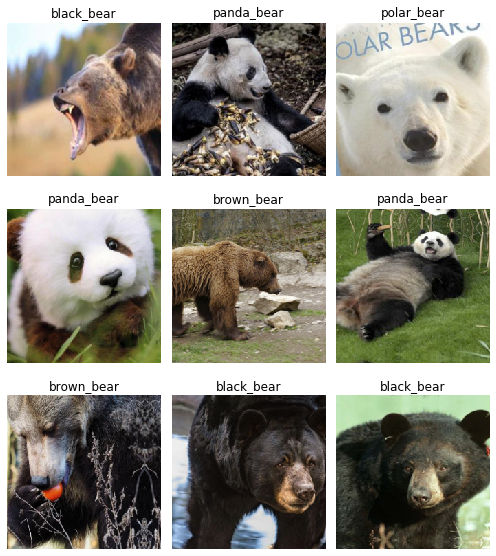

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black_bear', 'brown_bear', 'panda_bear', 'polar_bear'], 4, 445, 111)

### Train model

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.371515,0.462519,0.126126,00:08
1,0.765531,0.187693,0.081081,00:04
2,0.526389,0.140542,0.054054,00:04
3,0.395922,0.139658,0.054054,00:04


In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


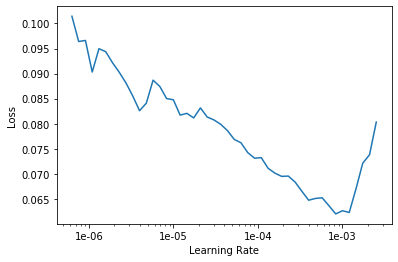

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.105679,0.155185,0.072072,00:05
1,0.078198,0.131439,0.045045,00:05


In [21]:
learn.save('stage-2')

### Interpretation

In [22]:
learn.load('stage-1');

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

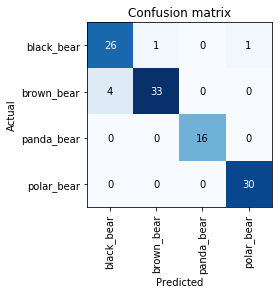

In [24]:
interp.plot_confusion_matrix()

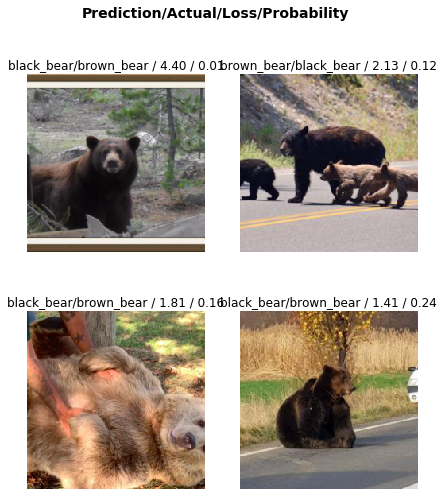

In [25]:
interp.plot_top_losses(4, figsize=(7,8))

In [26]:
interp.most_confused(min_val=2)

[('brown_bear', 'black_bear', 4)]

### Prepare for deployment
Create 'export.pkl' with everything we need to deploy the model (the model with the weights, but also some metadata like the classes or the transforms/normalization used).

In [27]:
learn.export()

In [28]:
defaults.device = torch.device('cpu')

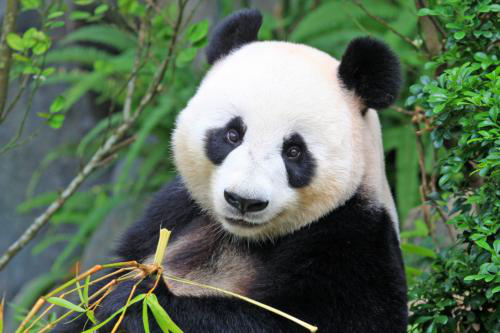

In [29]:
img = open_image(path/'panda_bear'/'00000011.jpg')
img

When we create our Learner in a deplotment enviromnent like this, just make sure that path contains the file 'export.pkl' from before.


In [30]:
learn = load_learner(path)

In [31]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category panda_bear

In [32]:
sorted(
    zip(learn.data.classes, map(float, outputs) ),
    key=lambda p: p[1],
    reverse=True
)

[('panda_bear', 0.9999439716339111),
 ('black_bear', 3.6512003134703264e-05),
 ('brown_bear', 1.1967537830059882e-05),
 ('polar_bear', 7.46432988307788e-06)]